# 0. 라이브러리

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats

In [13]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format="{:.5f}".format

# 1. 데이터 불러오기

In [14]:
data = pd.read_csv('./data/기업별재무거시데이터.csv',
    dtype={'종목코드':str})

In [15]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000,0,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기업명       1522 non-null   object 
 1   종목코드      1522 non-null   object 
 2   상장일       1522 non-null   object 
 3   지속기간      1522 non-null   int64  
 4   기준연도      1522 non-null   int64  
 5   부채비율      1522 non-null   float64
 6   자기자본비율    1522 non-null   float64
 7   총자산영업이익율  1522 non-null   float64
 8   ROA       1522 non-null   float64
 9   ROE       1522 non-null   float64
 10  매출액영업이익율  1522 non-null   float64
 11  총자산증가율    1522 non-null   float64
 12  매출액증가율    1522 non-null   float64
 13  당기순이익증가율  1522 non-null   float64
 14  영업이익증가율   1522 non-null   float64
 15  유동비율      1522 non-null   float64
 16  자산회전율     1522 non-null   float64
 17  부채회전율     1522 non-null   float64
 18  자본회전율     1522 non-null   float64
 19  총매출액규모    1522 non-null   float64
 20  총자산규모     1522 non-null   floa

# 2. 생존분석 - 모수적 방법
- 지수, 와이불, 로그정규, 로그로그

- 생존시간: `지속기간`
- 중도절단시간: `폐지일`
- 관측시간: 2022-12-31
- 절단표시변수: `부도`

In [17]:
from lifelines import KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalAFTFitter, LogLogisticAFTFitter, WeibullAFTFitter

In [18]:
data1 = data[['지속기간', '부도']]
data1.sort_values('지속기간', inplace=True)
data1.head(2)
y = data1.지속기간
d = data1.부도
data1.head()

,지속기간,부도
268,670,0
1044,690,0
295,707,0
578,708,0
345,712,0


### 1) ExponentialFitter 변수 X

In [19]:
exp_fitter = ExponentialFitter()
exp_fitter.fit(data1['지속기간'], event_observed=data1['부도'])
exp_fitter.print_summary(decimals=4)

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1522 total observations, 1435 right-censored observations>
   number of observations = 1522
number of events observed = 87
           log-likelihood = -1079.1451
               hypothesis = lambda_ != 0

---
              coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 89676.7501  9614.3559       70832.9588      108520.5413

          cmp to      z      p   -log2(p)
lambda_   0.0000 9.3274 <5e-05    66.3206
---
AIC = 2160.2902

## 2) WeibullFitter 변수 X

In [20]:
weibull_fitter = WeibullFitter()
weibull_fitter.fit(data1['지속기간'], event_observed=data1['부도'])
weibull_fitter.print_summary(decimals=4)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1522 total observations, 1435 right-censored observations>
   number of observations = 1522
number of events observed = 87
           log-likelihood = -1054.2160
               hypothesis = lambda_ != 1, rho_ != 1

---
              coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 24600.2102  2835.6168       19042.5033       30157.9170
rho_        2.0166     0.1741           1.6753           2.3579

          cmp to      z      p   -log2(p)
lambda_   1.0000 8.6751 <5e-05    57.7477
rho_      1.0000 5.8386 <5e-05    27.5016
---
AIC = 2112.4319

### Custom regression models
https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Custom%20Regression%20Models.html

In [21]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000,0,NaN


In [22]:
data2 = data.drop(['기업명', '종목코드', '상장일', '기준연도', '폐지일'], axis=1)
data2 = data2[['지속기간', '부도', '부채비율', '자기자본비율', '총자산영업이익율', 'ROA', 'ROE', '매출액영업이익율',
       '총자산증가율', '매출액증가율', '당기순이익증가율', '영업이익증가율', '유동비율', '자산회전율', '부채회전율',
       '자본회전율', '총매출액규모', '총자산규모', 'GDP성장률', '원달러환율', 'CD91일', '코스닥종가',
       '전산업생산지수', '경제심리지수', '뉴스심리지수']]
data2.head(1)

,지속기간,부도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
0,7861,0,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000


## 3) Exponential AFT

In [23]:
from lifelines.fitters import ParametricRegressionFitter
from autograd import numpy as np

class ExponentialAFTFitter(ParametricRegressionFitter):

    # this class property is necessary, and should always be a non-empty list of strings.
    _fitted_parameter_names = ['lambda_']

    def _cumulative_hazard(self, params, t, Xs):
        # params is a dictionary that maps unknown parameters to a numpy vector.
        # Xs is a dictionary that maps unknown parameters to a numpy 2d array
        beta = params['lambda_']
        X = Xs['lambda_']
        lambda_ = np.exp(np.dot(X, beta))
        return t / lambda_


# the below variables maps {dataframe columns, formulas} to parameters
regressors = {
    # could also be: 'lambda_': rossi.columns.difference(['week', 'arrest'])
    'lambda_': "부채비율 + 자기자본비율 + 총자산영업이익율 + ROA + ROE + 매출액영업이익율 + 총자산증가율 +\
        당기순이익증가율 + 영업이익증가율 + 유동비율 + 자산회전율 + 부채회전율 + 자본회전율 + 총매출액규모 + 총자산규모+\
        GDP성장률 + 원달러환율 + 소비자물가지수증감 + CD91일 + 코스피종가 + 코스닥종가 + 경상수지 + 전산업생산지수 +\
        경제심리지수 + 뉴스심리지수 + 1"
}

In [24]:
exponential_aft = ExponentialAFTFitter()
exponential_aft.fit(data2, '지속기간', '부도', regressors=regressors)
exponential_aft.print_summary(decimals=4)

<lifelines.ExponentialAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -4006.4981
         time fit was run = 2023-12-18 14:44:12 UTC

---
                     coef  exp(coef)                 se(coef)            coef lower 95%           coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                                         
lambda_ Intercept  0.0113     1.0114 4910154933857480704.0000 -9623726828872312832.0000 9623726828872312832.0000               0.0000                  inf
        부채비율       0.0000     1.0000       4481071736751.7021       -8782739216173.6865       8782739216173.6865               0.0000                  inf
        자기자본비율     0.0481     1.0492   16217843627014544.0000   -31786389415850948.0000   31786389415850948.0000               0.0000                  inf
        총자산영업이익율   0.0003     1.0003   27382456032013456.0000   -53668627630997928.0000   53668627630997928.0000               0.0000                  inf
        ROA       -0.0037     0.9963    5004838547239055.0000    -9809303301026314.0000    9809303301026314.0000               0.0000                  inf
        ROE       -0.0001     0.9999     576952513135860.7500    -1130806146536159.5000    1130806146536159.5000               0.0000                  inf
        매출액영업이익율  -0.0000     1.0000     388136625487411.5000     -760733807036237.7500     760733807036237.7500               0.0000                  inf
        총자산증가율    -0.0000     1.0000      86734105098517.2188     -169995722224405.6250     169995722224405.6250               0.0000                  inf
        당기순이익증가율   0.0000     1.0000       5818476276095.1348      -11404003946047.1953      11404003946047.1953               0.0000                  inf
        영업이익증가율    0.0000     1.0000      12007274975894.8457      -23533826505222.9414      23533826505222.9414               0.0000                  inf
        유동비율       0.0010     1.0010    3153185728945293.0000    -6180130465298451.0000    6180130465298451.0000               0.0000                  inf
        자산회전율      0.0350     1.0357   26887628881156144.0000   -52698784236745032.0000   52698784236745032.0000               0.0000                  inf
        부채회전율      0.0056     1.0056    6900590396839953.0000   -13524908649869268.0000   13524908649869268.0000               0.0000                  inf
        자본회전율      0.0031     1.0031    1063223434326178.3750    -2083879638798297.0000    2083879638798297.0000               0.0000                  inf
        총매출액규모     0.1021     1.1074    8746617040621510.0000   -17143054386182470.0000   17143054386182470.0000               0.0000                  inf
        총자산규모      0.1677     1.1826   10621649514066282.0000   -20818050503977280.0000   20818050503977280.0000               0.0000                  inf
        GDP성장률     0.1734     1.1894  562805481494462016.0000 -1103078474030869376.0000 1103078474030869376.0000               0.0000                  inf
        원달러환율      0.0146     1.0147     790580179805475.2500    -1549508679309931.7500    1549508679309931.7500               0.0000                  inf
        CD91일      0.3560     1.4276  600630650113873024.0000 -1177214442234069760.0000 1177214442234069760.0000               0.0000                  inf
        코스닥종가      0.0034     1.0034     986744696095205.1250    -1933984066282523.0000    1933984066282523.0000               0.0000                  inf
        전산업생산지수    0.2088     1.2322   30649238847483296.0000   -60071404294633176.0000   60071404294633176.0000               0.0000                  inf
        경제심리지수     0.1865     1.2050  132207670266770352.0000  -259122272202816864.0000  25912227220281

### 4) Weibull AFT

In [25]:
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data2, '지속기간', '부도')
weibull_aft.print_summary(decimals=4)

<lifelines.WeibullAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -805.3328
         time fit was run = 2023-12-18 14:44:12 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ CD91일      3.5851    36.0557     1.2635           1.1086           6.0615               3.0301             429.0360
        GDP성장률     0.1424     1.1530     0.6527          -1.1369           1.4217               0.3208               4.1441
        ROA       -0.1148     0.8915     0.0591          -0.2307           0.0011               0.7939               1.0011
        ROE        0.0070     1.0070     0.0071          -0.0069           0.0208               0.9931               1.0210
        경제심리지수     0.2369     1.2673     0.1730          -0.1022           0.5760               0.9029               1.7789
        뉴스심리지수    -0.4246     0.6540     0.1193          -0.6586          -0.1907               0.5176               0.8264
        당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001          -0.0000               0.9999               1.0000
        매출액영업이익율  -0.0122     0.9878     0.0201          -0.0516           0.0271               0.9497               1.0275
        매출액증가율     0.0003     1.0003     0.0003          -0.0002           0.0008               0.9998               1.0008
        부채비율       0.0000     1.0000     0.0000          -0.0001           0.0001               0.9999               1.0001
        부채회전율      0.0089     1.0090     0.0508          -0.0906           0.1085               0.9133               1.1146
        영업이익증가율    0.0001     1.0001     0.0001           0.0000           0.0002               1.0000               1.0002
        원달러환율     -0.0079     0.9921     0.0042          -0.0161           0.0002               0.9840               1.0002
        유동비율      -0.0136     0.9865     0.0078          -0.0290           0.0017               0.9714               1.0017
        자기자본비율     0.1111     1.1175     0.1179          -0.1200           0.3421               0.8869               1.4079
        자본회전율      0.0011     1.0011     0.0075          -0.0136           0.0158               0.9864               1.0159
        자산회전율      0.3260     1.3854     0.2425          -0.1493           0.8013               0.8613               2.2284
        전산업생산지수   -0.2683     0.7647     0.0867          -0.4382          -0.0983               0.6452               0.9064
        총매출액규모    -0.1324     0.8760     0.0954          -0.3194           0.0546               0.7266               1.0562
        총자산규모      0.1929     1.2128     0.1034          -0.0097           0.3955               0.9903               1.4851
        총자산영업이익율   0.3987     1.4899     0.2299          -0.0519           0.8493               0.9495               2.3381
        총자산증가율     0.0008     1.0008     0.0007          -0.0006           0.0022               0.9994               1.0022
        코스닥종가      0.0237     1.0240     0.0061           0.0117           0.0357               1.0118               1.0363
        Intercept 39.4080 1.3022e+17    13.7927          12.3749          66.4411           2.3678e+05           7.1615e+28
rho_    Intercept  1.0822     2.9512     0.0874           0.9109           1.2535               2.4866               3.5025

                    cmp to       z      p   -log2(p)
param   covariate                                   
lambda_ CD91일       0.0000  2.8373 0.0045     7.7802
        GDP성장률      0.0000  0.2181 0.8273     0.2735
        ROA         0.0000 -1.9411 0.0522     4.2586
        ROE         0.0000  0.9859 0.3242     1.6251
      

### 5) LogNormal AFT

In [26]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(data2, '지속기간', '부도')
lognormal_aft.print_summary(decimals=4)

<lifelines.LogNormalAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -811.0444
         time fit was run = 2023-12-18 14:44:13 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                          
mu_    CD91일      5.3104   202.4296     1.6145           2.1459           8.4749               8.5500            4792.7111
       GDP성장률     0.7878     2.1987     0.8363          -0.8512           2.4269               0.4269              11.3240
       ROA       -0.1185     0.8882     0.0794          -0.2742           0.0371               0.7602               1.0378
       ROE        0.0050     1.0050     0.0090          -0.0127           0.0226               0.9874               1.0229
       경제심리지수     0.2116     1.2356     0.2238          -0.2270           0.6502               0.7969               1.9159
       뉴스심리지수    -0.5972     0.5503     0.1553          -0.9017          -0.2928               0.4059               0.7462
       당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001           0.0000               0.9999               1.0000
       매출액영업이익율  -0.0152     0.9849     0.0251          -0.0644           0.0340               0.9376               1.0346
       매출액증가율     0.0007     1.0007     0.0003           0.0001           0.0013               1.0001               1.0013
       부채비율       0.0000     1.0000     0.0001          -0.0001           0.0001               0.9999               1.0001
       부채회전율      0.1260     1.1343     0.0638           0.0010           0.2510               1.0010               1.2854
       영업이익증가율    0.0001     1.0001     0.0001          -0.0001           0.0002               0.9999               1.0002
       원달러환율     -0.0146     0.9855     0.0057          -0.0256          -0.0035               0.9747               0.9965
       유동비율      -0.0094     0.9907     0.0078          -0.0246           0.0058               0.9757               1.0058
       자기자본비율    -0.0839     0.9195     0.1107          -0.3009           0.1330               0.7402               1.1423
       자본회전율      0.0028     1.0028     0.0107          -0.0182           0.0239               0.9819               1.0242
       자산회전율      0.0624     1.0644     0.2345          -0.3971           0.5220               0.6723               1.6854
       전산업생산지수   -0.4113     0.6628     0.1135          -0.6338          -0.1889               0.5306               0.8279
       총매출액규모    -0.1167     0.8899     0.1078          -0.3280           0.0946               0.7204               1.0992
       총자산규모      0.2808     1.3242     0.1151           0.0552           0.5064               1.0567               1.6593
       총자산영업이익율   0.3385     1.4028     0.2298          -0.1118           0.7888               0.8942               2.2007
       총자산증가율     0.0002     1.0002     0.0010          -0.0018           0.0022               0.9982               1.0022
       코스닥종가      0.0342     1.0348     0.0079           0.0188           0.0496               1.0190               1.0509
       Intercept 66.2905 6.1603e+28    18.2725          30.4771         102.1039           1.7221e+13           2.2036e+44
sigma_ Intercept -0.7591     0.4681     0.0771          -0.9103          -0.6080               0.4024               0.5444

                   cmp to       z      p   -log2(p)
param  covariate                                   
mu_    CD91일       0.0000  3.2891 0.0010     9.9584
       GDP성장률      0.0000  0.9421 0.3461     1.5305
       ROA         0.0000 -1.4924 0.1356     2.8825
       ROE         0.0000  0.5504 0.5820     0.7809
       경제심리지수      0.0000  0.9455 0.3

### 6) LogLogistic AFT

In [27]:
loglogistic_aft = LogLogisticAFTFitter()
loglogistic_aft.fit(data2, '지속기간', '부도')
loglogistic_aft.print_summary(decimals=4)

<lifelines.LogLogisticAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -813.5234
         time fit was run = 2023-12-18 14:44:16 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                          
alpha_ CD91일      0.5103     1.6657     1.8353          -3.0869           4.1074               0.0456              60.7902
       GDP성장률    -1.1540     0.3154     0.9019          -2.9216           0.6137               0.0538               1.8472
       ROA       -0.0873     0.9164     0.0790          -0.2421           0.0674               0.7850               1.0698
       ROE        0.0116     1.0117     0.0089          -0.0059           0.0291               0.9941               1.0295
       경제심리지수     0.4818     1.6189     0.2339           0.0234           0.9401               1.0237               2.5602
       뉴스심리지수    -0.3643     0.6947     0.1696          -0.6967          -0.0319               0.4982               0.9686
       당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001          -0.0000               0.9999               1.0000
       매출액영업이익율  -0.0181     0.9821     0.0244          -0.0659           0.0298               0.9362               1.0302
       매출액증가율     0.0007     1.0007     0.0003           0.0001           0.0014               1.0001               1.0014
       부채비율      -0.0000     1.0000     0.0001          -0.0001           0.0001               0.9999               1.0001
       부채회전율      0.0687     1.0711     0.0616          -0.0521           0.1894               0.9493               1.2085
       영업이익증가율    0.0001     1.0001     0.0001          -0.0000           0.0002               1.0000               1.0002
       원달러환율      0.0003     1.0003     0.0066          -0.0126           0.0132               0.9875               1.0133
       유동비율      -0.0106     0.9894     0.0089          -0.0280           0.0068               0.9723               1.0068
       자기자본비율    -0.0737     0.9290     0.1215          -0.3118           0.1644               0.7321               1.1787
       자본회전율     -0.0023     0.9977     0.0092          -0.0203           0.0157               0.9799               1.0159
       자산회전율      0.2538     1.2890     0.2657          -0.2670           0.7747               0.7657               2.1699
       전산업생산지수   -0.2397     0.7869     0.1261          -0.4869           0.0075               0.6145               1.0076
       총매출액규모    -0.1791     0.8360     0.1124          -0.3995           0.0413               0.6706               1.0421
       총자산규모      0.3152     1.3706     0.1207           0.0786           0.5518               1.0818               1.7365
       총자산영업이익율   0.5441     1.7230     0.2435           0.0667           1.0214               1.0690               2.7771
       총자산증가율    -0.0005     0.9995     0.0011          -0.0025           0.0016               0.9975               1.0016
       코스닥종가      0.0148     1.0149     0.0091          -0.0030           0.0325               0.9970               1.0331
       Intercept 10.1810 26396.7445    21.5564         -32.0688          52.4308               0.0000           5.8938e+22
beta_  Intercept  1.3478     3.8488     0.0978           1.1562           1.5393               3.1777               4.6615

                   cmp to       z      p   -log2(p)
param  covariate                                   
alpha_ CD91일       0.0000  0.2780 0.7810     0.3566
       GDP성장률      0.0000 -1.2795 0.2007     2.3168
       ROA         0.0000 -1.1059 0.2688     1.8957
       ROE         0.0000  1.2973 0.1945     2.3621
       경제심리지수      0.0000  2.0601 0

In [29]:
data3 = data2[['지속기간', '부도', '경제심리지수', '뉴스심리지수', '당기순이익증가율', '매출액증가율', '총자산규모', '총자산영업이익율']]

In [30]:
data3 = data2[['지속기간', '부도', '경제심리지수', '뉴스심리지수', '당기순이익증가율', '매출액증가율', '총자산규모', '총자산영업이익율']]
loglogistic_aft = LogLogisticAFTFitter()
loglogistic_aft.fit(data3, '지속기간', '부도')
loglogistic_aft.print_summary(decimals=4)

<lifelines.LogLogisticAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -868.0088
         time fit was run = 2023-12-18 14:44:47 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                          
alpha_ 경제심리지수     0.0664     1.0686     0.0081           0.0506           0.0822               1.0519               1.0857
       뉴스심리지수    -0.1093     0.8965     0.0106          -0.1300          -0.0885               0.8781               0.9153
       당기순이익증가율  -0.0001     0.9999     0.0000          -0.0002          -0.0000               0.9998               1.0000
       매출액증가율     0.0001     1.0001     0.0000           0.0001           0.0002               1.0001               1.0002
       총자산규모      0.1477     1.1592     0.0457           0.0581           0.2373               1.0599               1.2679
       총자산영업이익율   0.4250     1.5295     0.1236           0.1828           0.6671               1.2005               1.9487
       Intercept 10.0455 23051.3412     1.5417           7.0237          13.0672            1122.9442           4.7319e+05
beta_  Intercept  1.1548     3.1735     0.0872           0.9840           1.3257               2.6752               3.7647

                   cmp to        z      p   -log2(p)
param  covariate                                    
alpha_ 경제심리지수      0.0000   8.2368 <5e-05    52.3287
       뉴스심리지수      0.0000 -10.3223 <5e-05    80.5661
       당기순이익증가율    0.0000  -3.2349 0.0012     9.6826
       매출액증가율      0.0000   3.3540 0.0008    10.2941
       총자산규모       0.0000   3.2317 0.0012     9.6666
       총자산영업이익율    0.0000   3.4390 0.0006    10.7421
       Intercept   0.0000   6.5156 <5e-05    33.6856
beta_  Intercept   0.0000  13.2507 <5e-05   130.7170
---
Concordance = 0.9672
AIC = 1752.0176
log-likelihood ratio test = 371.5709 on 6 df
-log2(p) of ll-ratio test = 253.9412

In [31]:
loglogistic_aft.survival_function_.plot(figsize=(8,5))
plt.show()

AttributeError: 'LogLogisticAFTFitter' object has no attribute 'survival_function_'

In [41]:
print('평균생존시간 =', round(loglogistic_aft.mean_survival_time_/365, 2), '년')
print('중앙생존시간 =', round(loglogistic_aft.median_survival_time_/365, 2), '년')

평균생존시간 = 86.95 년
중앙생존시간 = 73.42 년


In [43]:
print('평균생존시간 =', round(loglogistic_aft.mean_survival_time_/365, 2), '년,',\
    '중앙생존시간 =', round(loglogistic_aft.median_survival_time_/365, 2), '년')

평균생존시간 = 86.95 년, 중앙생존시간 = 73.42 년


<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

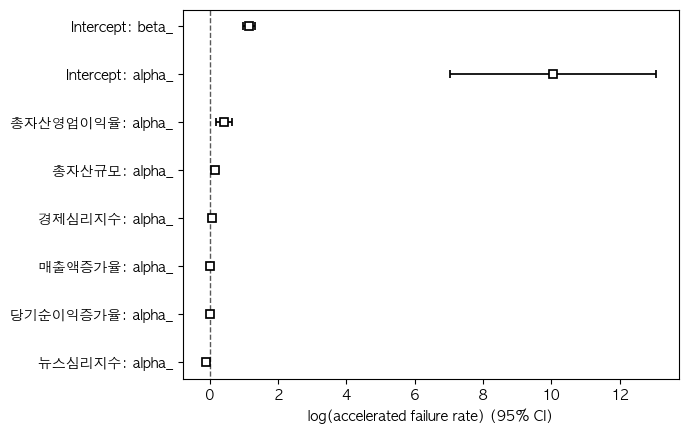

In [38]:
loglogistic_aft.plot()

### +) Backward Elimination

In [ ]:
# ## Backward Elimination
# def Backward_elimination(data, duration_col='time', event_col='censor'):
#     data1 = data.copy()
#     steps = []
#     models = []
#     m = ExponentialAFTFitter()
#     var = 'full'
#     while data1.shape[1]>2:
#         regressors = {'lambda_': ' + '.join(data1.iloc[:,2:].columns) + '+ 1'}
#         m.fit(data1, duration_col, event_col, regressors=regressors)
#         models.append(m.AIC_)

#         X = data1.copy()
#         y = X[[duration_col, event_col]]
#         X.drop([duration_col, event_col], axis=1, inplace=True)
#         n_features = X.shape[1]
#         score = []
#         m1 = ExponentialAFTFitter()

#         for j in X.columns:
#             Xj = X.drop(j, axis=1, inplace=False)
#             regressors1 = {'lambda_': ' + '.join(Xj.iloc[:,2:].columns) + '+ 1'}
#             Xj=pd.merge(y, Xj, how='right', left_index=True, right_index=True)
#             m1.fit(Xj, duration_col, event_col, regressors=regressors1)
#             score.append(m1.AIC_)

#         score = np.array(score)
#         temp = [None, None]
#         temp.extend(score.tolist())
#         result = pd.DataFrame([data1.columns.tolist(), temp]).T
#         steps.append(result)
#         print('\n', var, '\n',m.AIC_)
#         print('\n-------------------')
#         print(result)
#         var = '- ' + data.columns[score.argmin()+2]
#         data1.drop(data1.columns[score.argmin()+2], axis=1, inplace=True)

#     regressors = {'lambda_': ' + '.join(steps[np.array(models).argmin()].iloc[2:,0]) + '+ 1'}
#     obj = m.fit(data[steps[np.array(models).argmin()].iloc[:,0]], duration_col, event_col, regressors=regressors)
#     return obj

In [ ]:
# obj1 = Backward_elimination(data2, '지속기간', '부도')
# obj1.print_summary(decimals=4)